In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
import scipy
import datetime
from scipy.optimize import minimize
%matplotlib inline
import scipy.optimize as sco
import scipy.interpolate as sci
import math

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/ADS2002 Portfolio Optimisation/Data/adjprice.csv")
data.head()

In [ ]:
stock = ['Date','AMG US Equity','CCK US Equity','BLK US Equity','TEN US Equity','REGN US Equity']
weight = [0.02,0,0.94,0.03,0.01]
stock

['Date',
 'AMG US Equity',
 'CCK US Equity',
 'BLK US Equity',
 'TEN US Equity',
 'REGN US Equity']

In [ ]:
# data = pd.read_csv("data/adjprice.csv")
data = data[stock]
data = data[(data['Date']>20000000)&( data['Date']< 20101231 )].reset_index()
data.head()

,index,Date,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
0,2307,20000101,26.6182,20.8321,12.349,8.7282,12.750
1,2308,20000102,26.6182,20.8321,12.349,8.7282,12.750
2,2309,20000103,24.1909,20.7157,11.945,9.3725,12.313
3,2310,20000104,22.2573,21.2394,11.406,10.1926,12.000
4,2311,20000105,21.7224,21.8795,11.317,9.7240,11.500


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data

,index,Date,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
0,2307,2000-01-01,26.6182,20.8321,12.349,8.7282,12.750
1,2308,2000-01-02,26.6182,20.8321,12.349,8.7282,12.750
2,2309,2000-01-03,24.1909,20.7157,11.945,9.3725,12.313
3,2310,2000-01-04,22.2573,21.2394,11.406,10.1926,12.000
4,2311,2000-01-05,21.7224,21.8795,11.317,9.7240,11.500
...,...,...,...,...,...,...,...
4012,6319,2010-12-26,98.5508,33.8000,153.974,40.1708,33.500
4013,6320,2010-12-27,98.8174,33.7600,154.455,40.7996,33.690
4014,6321,2010-12-28,98.4817,33.7300,154.578,40.0160,33.500
4015,6322,2010-12-29,98.4520,33.7200,155.728,40.0063,33.320


In [ ]:
psy= data.set_index('Date') #transforming the data from datetime format
data1 = psy.drop(['index'], axis=1)


In [ ]:
data1.head()

,AMG US Equity,CCK US Equity,BLK US Equity,TEN US Equity,REGN US Equity
Date,,,,,
2000-01-01,26.6182,20.8321,12.349,8.7282,12.750
2000-01-02,26.6182,20.8321,12.349,8.7282,12.750
2000-01-03,24.1909,20.7157,11.945,9.3725,12.313
2000-01-04,22.2573,21.2394,11.406,10.1926,12.000
2000-01-05,21.7224,21.8795,11.317,9.7240,11.500


This plot shows how the price of each asset evolved in the given timeframe.
BLK US Equity and AMG US Equity showed the most growth out the five.

Text(0, 0.5, 'price in $')

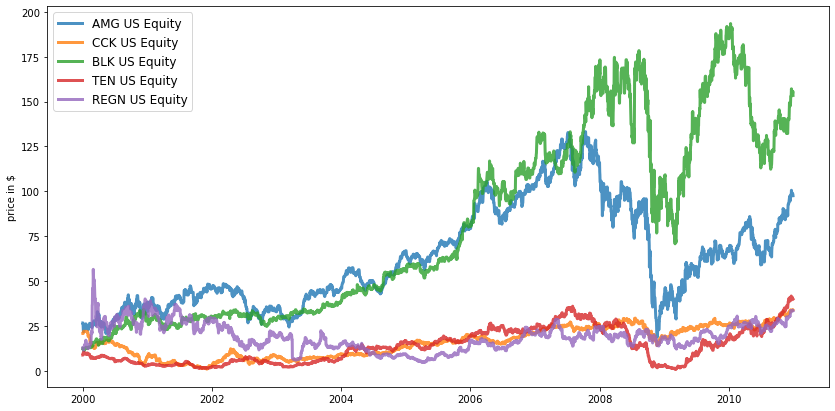

In [ ]:
plt.figure(figsize=(14, 7))
for c in data1.columns.values:
    plt.plot(data1.index, data1[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### The Daily Return plot

This plot shows the stocks volatility by plotting daily returns instead of actual prices. This is done using .pct_change()

Text(0, 0.5, 'daily returns')

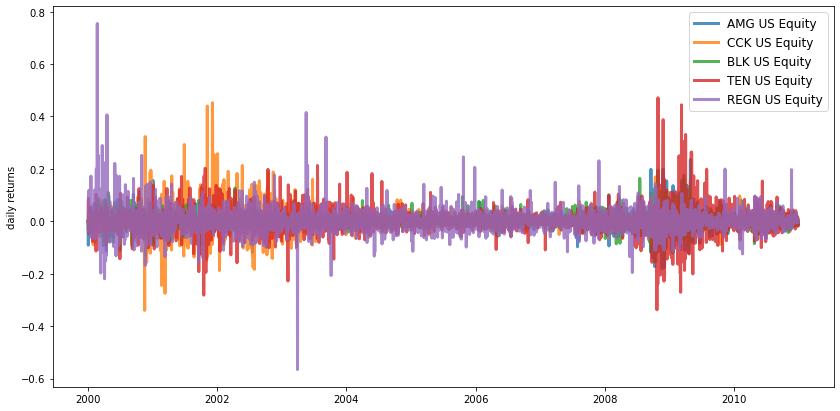

In [ ]:
returns = data1.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

## Random Portfolios Generation

We have 5 stocks in our portfolio. One decision we have to make is how we should allocate our budget to each of stock in our portfolio. If our total budget is 1, then we can decide the weights for each stock such that the sum of weights will be 1.The value for the weights will be the portion of budget we allocate to a specific stock e.g , if weight is 0.5 for AMG, it means that we allocate 50% of our budget to AMG.

The functions below simulate random weights to each stock in the portfolio, then calculate the porfolio's overall annualised returns and volatility

The “portfolio_annualised_performance” function will calculate the returns and volatility, and make it an annualised calculation as we take into I take into account 252 as the number of trading days in one year. “random_portfolios” function will generate portfolios with random weights assigned to each stock, and by giving num_portfolios argument, you can decide how many random portfolios you want to generate.

The code block below looks at:
* Portfolio Standard deviation
* Sharpe Ratio

#### Portfolio Standard Deviation
This function calculates the portfolio's volatility in the defined function, portfolio_annualised_performance.

We took into account the 252 trading days(rather, the square root of,) to calculate the annualised standard deviation of a portfolio.

#### Sharpe Ratio
check simon's example

In [ ]:
xrange = range
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in xrange(num_portfolios):
        weights = np.random.random(5)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

We get the daily returns by using pct_change() on data1 and by extension, the mean daily returns and the covariance matrix of returns. These are needed to calculate the portfolio returns and volatility.

We generated 25000 random portfolios from the dataframe, using a risk-free rate of 2.78% in the 52 week treasury bill rate of 2010.

The rationale behind this is, the price data chosen is from a ten year period of 2000-2010. Therefore, I assumed that the analysis is being done from the start of 2011. The trading days are: 252 = 52 weeks.

We used all these factors to match the annualised return and risk calculated.

In [ ]:
returns = data1.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0278

In [ ]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

The code above gets the maximum and minimum sharpe ratio, displays them as red and green stars respectively. Additionally, it allocates the budget between the 2 optimal portfolios found.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.32


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation           3.84           8.84          52.35          20.39   

            REGN US Equity  
allocation           14.59  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.29


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation           24.1          19.46          48.24           0.71   

            REGN US Equity  
allocation            7.49  


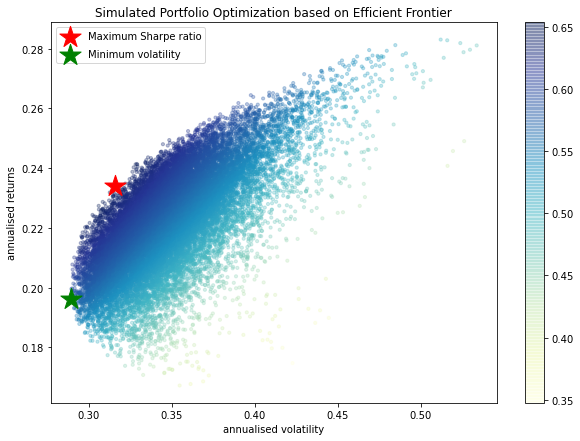

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

For minimum risk portfolio, we can see that more than half of our budget is allocated to the BLK US Equity.If you take another look at the daily return plot from earlier, you can see that BlackRock is the least volatile stock of four, so allocating a large percentage to BlackRock for minimum risk portfolio makes intuitive sense.

If we are willing to take higher risk for higher return, one that gives us the best risk-adjusted return is the one with maximum Sharpe ratio. In this scenario, we are allocating a significant portion to Tenneco inc and  RegeneRx Biopharmaceuticals Inc, which are quite volatile stocks from the previous plot of daily returns.

## The Efficient Frontier
In the block of code above, we found two optimal portfolios by simulating many random choices and picking the best 2 using the criteria:
* Minimum risk
* Maximum risk-adjusted return

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.31


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation            0.0          10.88          57.57          16.43   

            REGN US Equity  
allocation           15.13  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.29


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation          20.06           17.8          52.55           1.32   

            REGN US Equity  
allocation            8.28  


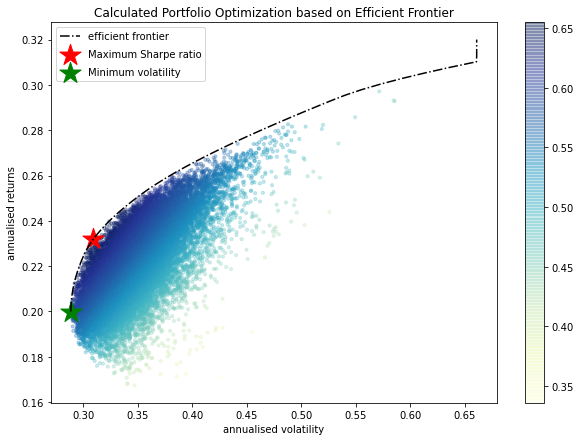

In [ ]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

We have almost the same result as what we have simulated by picking from the randomly generated portfolios. The slight difference is that the Scipy’s “optimize” function has not allocated any budget at all for Affiliated Managers Group on maximum Sharpe ratio portfolio, while one we chose from the randomly generated samples has 0.24% of allocation for Affiliated Managers Group.

Instead of plotting every randomly generated portfolio, we can plot each individual stocks on the plot with the corresponding values of each stock’s annual return and annual risk. This way we can see and compare how diversification is lowering the risk by optimising the allocation.

In [ ]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=data1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=data1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252

    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(data1.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(data1.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.23
Annualised Volatility: 0.31


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation            0.0          10.88          57.57          16.43   

            REGN US Equity  
allocation           15.13  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.29


            AMG US Equity  CCK US Equity  BLK US Equity  TEN US Equity  \
allocation          20.06           17.8          52.55           1.32   

            REGN US Equity  
allocation            8.28  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

AMG US Equity : annuaised return 0.16 , annualised volatility: 0.39
CCK US Equity : annuaised return 0.17 , ann

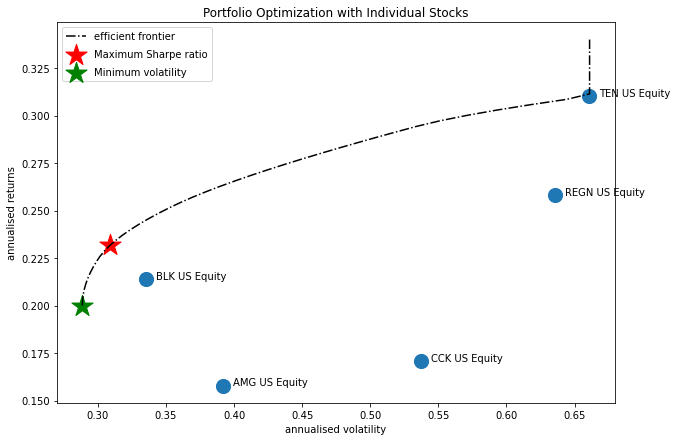

In [ ]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

As you can see, the stock with the least risk is AMG US Equity at around 0.40. But with portfolio optimisation, we can achieve even lower risk at 0.30, and still with a higher return than the AMG US Equity.